In [ ]:
import io
import networkx as nx
from collections import defaultdict
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import sys

# Path lengths

The first thing we want to take a look at is path lengths. NetworkX allows us to calculate the shortest path between any pair of articles. We begin by comparing the length of human and shortests paths.

### Exercise

** For each source/target pair in the list of human navigation paths, calculate the shortest path using NetworkX. Plot the distribution of path lengths**


We decided to use undirected graph. We start of by creating a undirected graph from the links.tsv file. We simply run through the file line by line. For each line (except the first 12 lines which only contain information about the dataset) we add an edge to the graph.

In [25]:
# Read in the links.tsv file
file_path = '/Users/GretarAtli/Dropbox/Dtu/Social_graphs_and_interactions/wikispeedia_paths-and-graph/links.tsv'

G = nx.Graph()

with open(file_path, encoding="utf-8") as f:
    lines = f.readlines()
    lines = lines[12:]
    for line in lines:
            line = line.split()
            G.add_edge(line[0],line[1])            
print("number of nodes: {}".format(len(G.nodes())))
print("number of edges: {}".format(len(G.edges())))

number of nodes: 4592
number of edges: 106647


The next step is to go through the finished paths and get the each source target pair

In [60]:
# container for the key value pairs (source, target)
source_target_pairs = []

# container for the length of every path
paths_length = []

# Read in the links.tsv file
file_path = '/Users/GretarAtli/Dropbox/Dtu/Social_graphs_and_interactions/wikispeedia_paths-and-graph/paths_finished.tsv'

with open(file_path, encoding="utf-8") as f:
    lines = f.readlines()
    lines = lines[16:] # Take out the lines that are not links
    for line in lines:
        line = line.split()[3] # Get the path from the line
        line = line.replace(";<","") # Back clicks are represented as "<", here we delete them from the path
        line = line.split(";") # split the path on ; to get an array of websites
        source = line[0] # find the source website
        target = line[-1] # find the target website
        
        source_target_pairs.append((source,target)) # add a key value pair as a tuple 
        paths_length.append(len(line))
        G_human.add_path(line) # Create the path in out network          
        

now everything is ready to calculate the shortest path between each source target pair. The reason for the try and catch block is that the node "Wikipedia_Text_of_the_GNU_Free_Documentation_License" is not part of the links list and therefore it is not in our graph. This is most likely just a minor error in the dataset

In [51]:
shortest_paths = []    

for source,target in source_target_pairs:
    try:
        shortest_paths.append(nx.shortest_path_length(G,source=source,target=target))
    except:
        print ("Unexpected error:", sys.exc_info()[0])
        print("target : {}".format(target))
        print("source : {}".format(source))
            

Unexpected error: <class 'networkx.exception.NetworkXError'>
target : Wikipedia_Text_of_the_GNU_Free_Documentation_License
source : Bird


Finally everything is ready to plot up the distribution of path lengths.

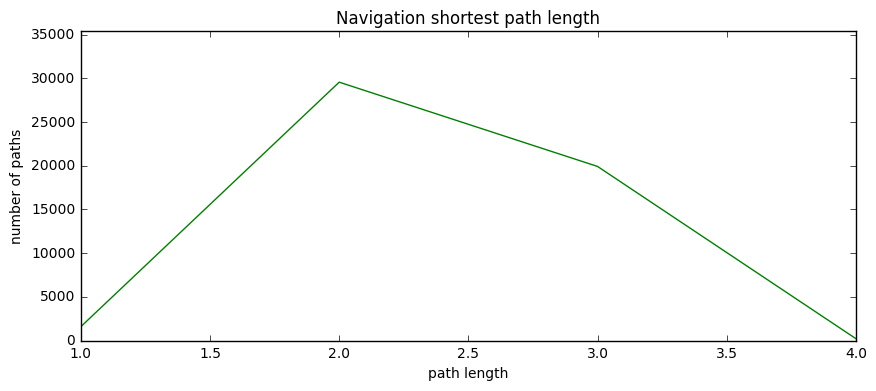

In [49]:
# plot the distribution
plt.figure(figsize=(10,4))
plt.plot(list(Counter(shortest_paths).keys()), list(Counter(shortest_paths).values()), color="green")
plt.xlim((1, 4))
plt.ylim(0,max(list(Counter(shortest_paths).values()))*1.2)
plt.title("Navigation shortest path length")
plt.xlabel("path length")
plt.ylabel("number of paths")
plt.show()

** For each source/target pair, calculate the length of the human path. The dataset contains information on people who regret a navigation step and hit the "back" button in their web-browser. It's up to you how to incorporate that information in the path. Justify your choice. Plot the distribution of human path lengths**

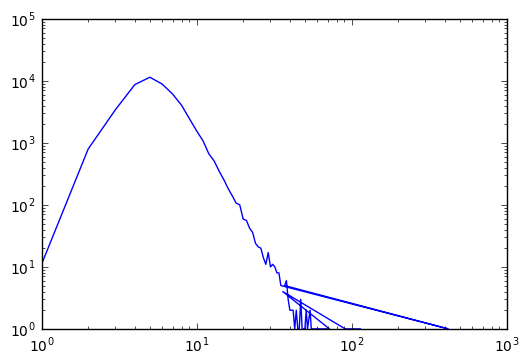

In [57]:
paths_length_counted = Counter(paths_length)

plt.plot(list(paths_length_counted.keys()), list(paths_length_counted.values()))
plt.xscale("log")
plt.yscale("log")
plt.show()